## Nuclei Technologies Internship Project-2


## Titanic Dataset

In [217]:
## Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [218]:
## importing test and train datasets
train = pd.read_csv('D:\\Amit\\Nuclei Tech\\project2\\train.csv')
test = pd.read_csv('D:\\Amit\\Nuclei Tech\\project2\\test.csv')

In [219]:
train.shape

(891, 12)

In [220]:
test.shape

(418, 11)

In [221]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [222]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [223]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Columns Name, Sex, Ticket, Cabin, Embarked are Categorical


Columns PassengerId, Pclass, Age, SibSp, Parch are Numerical

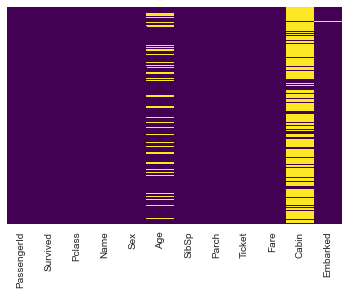

In [224]:
##CHecking for Null values across dataset
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Age has some Null values which might need imputation, but Cabin has too many Null values and might be dropped.

In [225]:
sns.set_style('whitegrid')

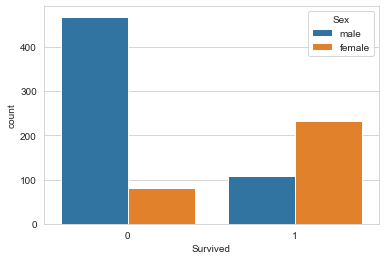

In [226]:
sns.countplot(x='Survived', hue='Sex',data=train)

--> It can be observed that majority of Non-survivors are Males, whereas more than half of Survivors are Females.

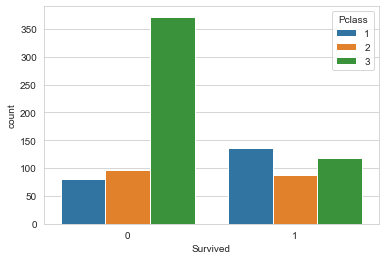

In [227]:
sns.countplot(x='Survived', hue='Pclass',data=train)

-->> It can be observed that Majority of Non-survivors were from Passenger class 2 and 3, whereas Survivors have higher number of Class 1 Passengers.

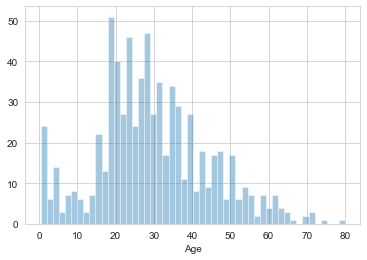

In [228]:
sns.distplot(train['Age'].dropna(),kde=False,bins=50)

--> It can be observed that there were many children of Age group 0 to 10 and other majority Passengers belonged to Age group 20 to 50

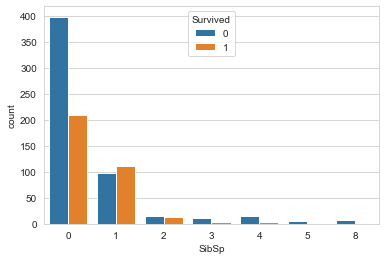

In [229]:
sns.countplot(x='SibSp', hue='Survived', data=train)

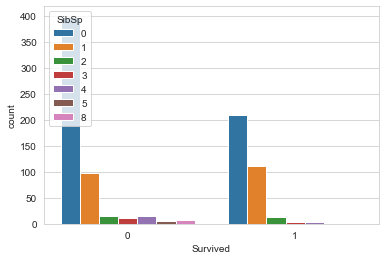

In [230]:
sns.countplot(x='Survived', hue='SibSp', data=train)

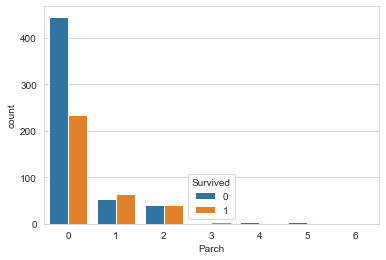

In [231]:
sns.countplot(x='Parch', hue='Survived', data=train)

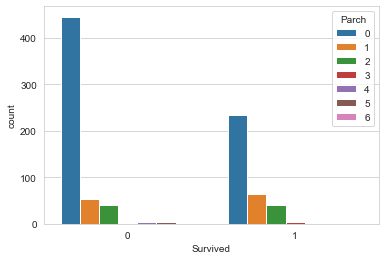

In [232]:
sns.countplot(x='Survived', hue='Parch', data=train)

#### Adding SiblingSpouse and ParentChildren to get a total count of family members of a Passenger

In [233]:
train['Family'] = train['SibSp'] + train['Parch']

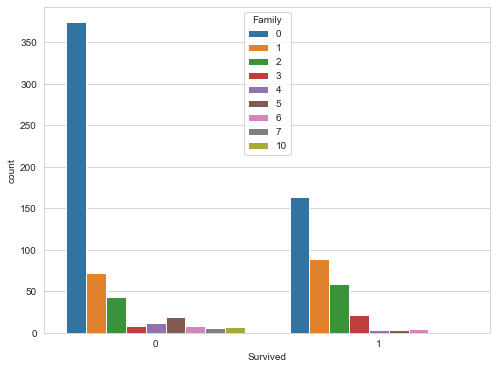

In [234]:
plt.figure(figsize=(8,6))
sns.countplot(x='Survived', hue='Family', data=train)

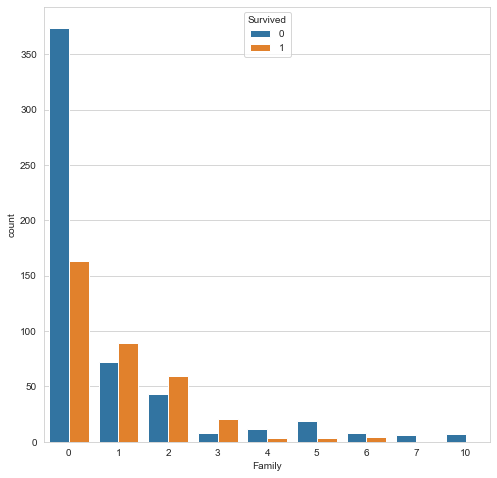

In [235]:
plt.figure(figsize=(8,8))
sns.countplot(x='Family', hue='Survived', data=train)

#### The trend in Survivors and Non-Survivors w.r.t no. of Family members is same, hence there doesnt seem to be any correlation betwwen Survival and the no. of Family members onboard of a particular Passenger.

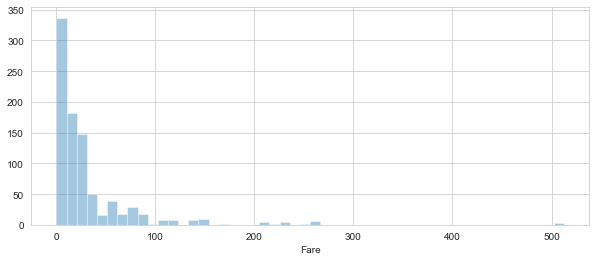

In [236]:
plt.figure(figsize=(10,4))
sns.distplot(train['Fare'].dropna(),kde=False,bins=50)

--> It can be observed that majority of the Passengers on-board had paid low-fare.

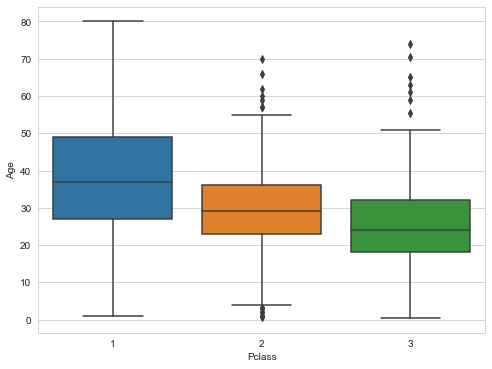

In [237]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Pclass', y='Age', data=train)

--> It can be observed that Age range decreases with Passenger Class, suggesting that higher Passenger Class Fares were paid by higher Age Groups rather than younger people.

In [238]:
## Lets find mean Age in each Passenger class
print('Mean Age of Pclass 1 is', round(train[train['Pclass']==1]['Age'].dropna().mean()))
print('Mean Age of Pclass 2 is', round(train[train['Pclass']==2]['Age'].dropna().mean()))
print('Mean Age of Pclass 3 is', round(train[train['Pclass']==3]['Age'].dropna().mean()))

Mean Age of Pclass 1 is 38
Mean Age of Pclass 2 is 30
Mean Age of Pclass 3 is 25


We can use above Age values for Imputation based on Passenger Class.

In [239]:
## Null Values in Age per passenger class 
print('Null values in Pclass 1', train[train['Pclass']==1]['Age'].isnull().sum())
print('Null values in Pclass 2', train[train['Pclass']==2]['Age'].isnull().sum())
print('Null values in Pclass 3', train[train['Pclass']==3]['Age'].isnull().sum())

Null values in Pclass 1 30
Null values in Pclass 2 11
Null values in Pclass 3 136


In [240]:
## Imputing Null values in Age using a function
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass==1:
            return 38
        elif Pclass==2:
            return 30
        else:
            return 25
    return Age


In [241]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [242]:
print('Null values in Pclass 1', train[train['Pclass']==1]['Age'].isnull().sum())
print('Null values in Pclass 2', train[train['Pclass']==2]['Age'].isnull().sum())
print('Null values in Pclass 3', train[train['Pclass']==3]['Age'].isnull().sum())

Null values in Pclass 1 0
Null values in Pclass 2 0
Null values in Pclass 3 0


-->> Above result shows that Null values have been replaces

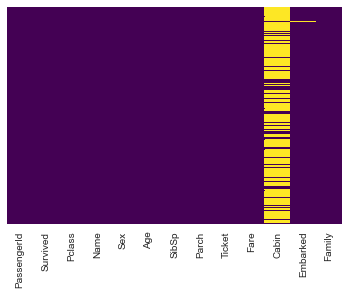

In [243]:
## Lets verify the same using earlier heatmap
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [244]:
## Now since Cabin has many Null values, dropping it
train.drop('Cabin',axis=1,inplace=True)

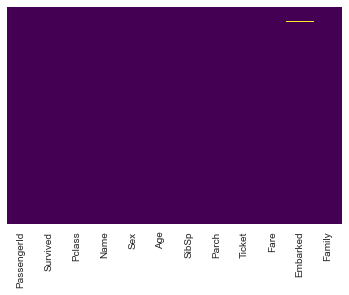

In [245]:
## Lets verify the same using earlier heatmap
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [246]:
## Dropping the remaining Null value from Embarked
train.dropna(inplace=True)

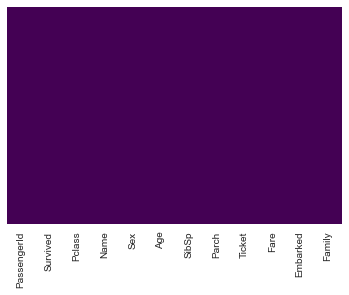

In [247]:
## Lets verify the same using earlier heatmap
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [248]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Family         0
dtype: int64

-->> All Null values have been treated now

In [249]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [250]:
## Converting Sex and Embarked column to numeric values for modelling
train.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [251]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0


In [252]:
## Dropping the columns that won't be used for modeling
train = train.drop(columns=['PassengerId','Name','Ticket','Family'],axis=1)

In [253]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [254]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [255]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,0
887,1,1,19.0,0,0,30.0000,0
888,3,1,25.0,1,2,23.4500,0
889,1,0,26.0,0,0,30.0000,1


In [256]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

#### Reference URL https://www.analyticsvidhya.com/blog/2021/07/titanic-survival-prediction-using-machine-learning/

## Logistic Regression Model

In [257]:
from sklearn.model_selection import train_test_split

In [258]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [259]:
from sklearn.linear_model import LogisticRegression

In [260]:
logmodel = LogisticRegression()

In [261]:
logmodel.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [262]:
y_pred = logmodel.predict(X_train)

In [263]:
from sklearn.metrics import classification_report

In [264]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       386
           1       0.76      0.70      0.73       236

    accuracy                           0.81       622
   macro avg       0.80      0.79      0.79       622
weighted avg       0.80      0.81      0.80       622



In [265]:
from sklearn.metrics import confusion_matrix

In [266]:
print(confusion_matrix(y_train,y_pred))

[[335  51]
 [ 70 166]]


In [267]:
acc_log = round(logmodel.score(X_train, y_train) * 100, 2)
acc_log

80.55

## Support Vector Machines

In [268]:
from sklearn.svm import SVC, LinearSVC

In [269]:
svc = SVC()

In [270]:
svc.fit(X_train, y_train)

SVC()

In [271]:
y_pred = svc.predict(X_train)

In [272]:
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

68.97

## k-Nearest Neighbors

In [273]:
from sklearn.neighbors import KNeighborsClassifier

In [274]:
knn = KNeighborsClassifier(n_neighbors = 3)

In [275]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [276]:
y_pred = knn.predict(X_train)

In [277]:
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

85.05

## Gaussian Naive Bayes

In [278]:
from sklearn.naive_bayes import GaussianNB

In [279]:
gaussian = GaussianNB()

In [280]:
gaussian.fit(X_train, y_train)

GaussianNB()

In [281]:
y_pred = gaussian.predict(X_train)

In [282]:
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

78.62

## Perceptron 

In [283]:
from sklearn.linear_model import Perceptron

In [284]:
perceptron = Perceptron()

In [285]:
perceptron.fit(X_train, y_train)

Perceptron()

In [286]:
y_pred = perceptron.predict(X_train)

In [287]:
acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
acc_perceptron

37.94

## Linear SVC

In [288]:
linear_svc = LinearSVC()

In [289]:
linear_svc.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [290]:
y_pred = linear_svc.predict(X_train)

In [291]:
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
acc_linear_svc

75.88

## Stochastic Gradient Descent

In [292]:
from sklearn.linear_model import SGDClassifier

In [293]:
sgd = SGDClassifier()

In [294]:
sgd.fit(X_train, y_train)

SGDClassifier()

In [295]:
y_pred = sgd.predict(X_train)

In [296]:
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
acc_sgd

62.54

## Decision Tree Classifier

In [297]:
from sklearn.tree import DecisionTreeClassifier

In [298]:
decision_tree = DecisionTreeClassifier()

In [299]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [300]:
y_pred = decision_tree.predict(X_train)

In [301]:
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

98.71

## Random Forest Classifier

In [302]:
from sklearn.ensemble import RandomForestClassifier

In [303]:
random_forest = RandomForestClassifier(n_estimators=100)

In [304]:
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [305]:
y_pred = random_forest.predict(X_train)

In [306]:
random_forest.score(X_train, y_train)

0.9871382636655949

In [307]:
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

98.71

## Model Evaluation
#### Reference code provided by Nuclei Technologies

In [308]:
models = pd.DataFrame({
'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
'Random Forest', 'Naive Bayes', 'Perceptron',
'Stochastic Gradient Decent', 'Linear SVC',
'Decision Tree'],
'Score': [acc_svc, acc_knn, acc_log,
acc_random_forest, acc_gaussian, acc_perceptron,
acc_sgd, acc_linear_svc, acc_decision_tree]})

In [309]:
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,98.71
8,Decision Tree,98.71
1,KNN,85.05
2,Logistic Regression,80.55
4,Naive Bayes,78.62
7,Linear SVC,75.88
0,Support Vector Machines,68.97
6,Stochastic Gradient Decent,62.54
5,Perceptron,37.94


## Checking Test Dataset

In [310]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [311]:
## Imputing Null Values in Age
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1)

In [312]:
## Now since Cabin has many Null values, dropping it
test.drop('Cabin',axis=1,inplace=True)

In [313]:
## Converting Sex and Embarked column to numeric values for modelling
test.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [314]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [316]:
## Dropping the remaining Null value from Fare
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

In [317]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [318]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,2
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0


In [319]:
## Dropping the columns that won't be used for Prediction
test = test.drop(columns=['PassengerId','Name','Ticket'],axis=1)

In [320]:
test.shape

(418, 7)

In [321]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


## Prediction on Test Dataset

In [322]:
y_final = random_forest.predict(test)

In [324]:
y_final

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [325]:
submission = pd.DataFrame({
"Survived": y_final
})

In [326]:
submission

,Survived
0,0
1,0
2,0
3,0
4,0
...,...
413,0
414,1
415,0
416,0


In [327]:
submission.to_csv('D:\\Amit\\Nuclei Tech\\project2\\final_submission.csv')